In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
dt = pd.read_csv("Loan Prediction Dataset.csv")
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
dt.shape

(614, 13)

In [4]:
dt.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [6]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [9]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

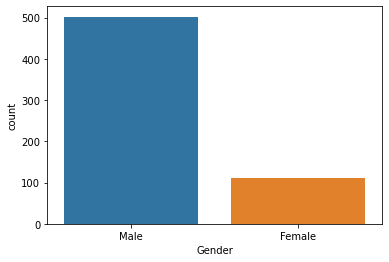

In [10]:
# categorical attributes visualization
sns.countplot(dt['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

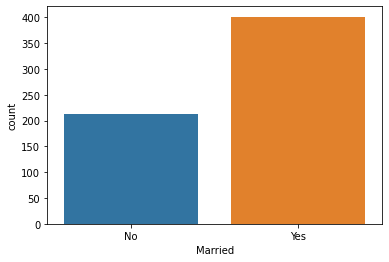

In [11]:
sns.countplot(dt['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

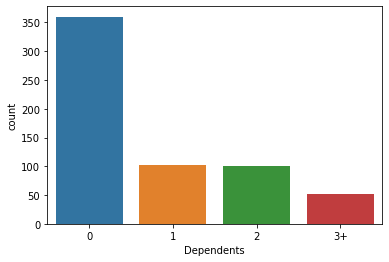

In [12]:
sns.countplot(dt['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

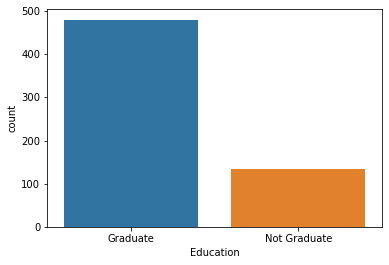

In [13]:
sns.countplot(dt['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

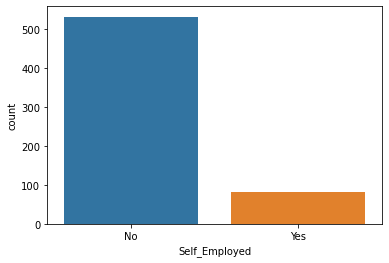

In [14]:
sns.countplot(dt['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

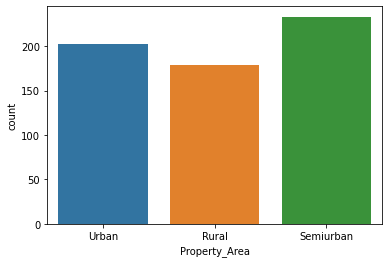

In [15]:
sns.countplot(dt['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

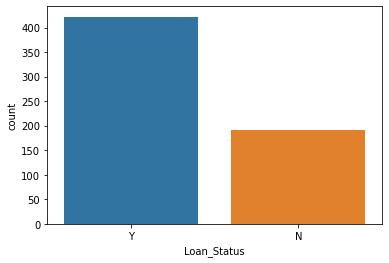

In [16]:
sns.countplot(dt['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

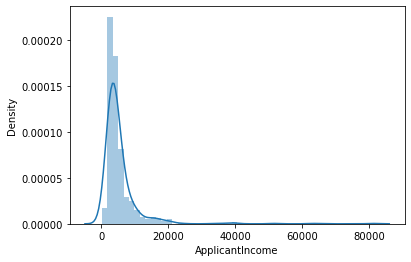

In [17]:
# numerical attributes visualization
sns.distplot(dt["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

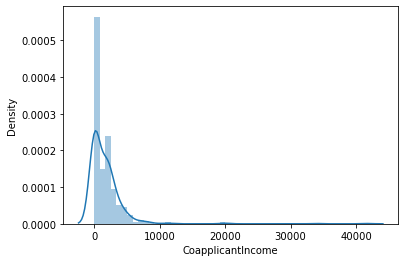

In [18]:
sns.distplot(dt["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

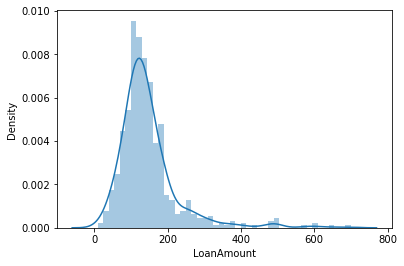

In [19]:
sns.distplot(dt["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

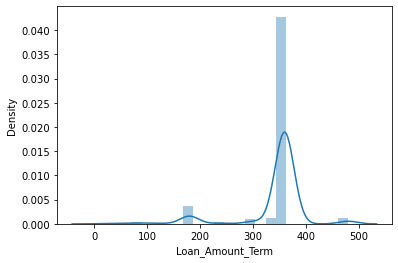

In [20]:
sns.distplot(dt['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

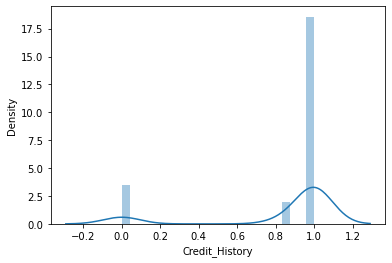

In [21]:
sns.distplot(dt['Credit_History'])

## Creation of new attributes

In [22]:
# total income
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  
0             1.0         Urban           Y        5849.0  
1             1.0         Rural           N        6091.0  
2             1.0         Urban           Y        3000.0  
3             1.0         Urban           Y        4941.0  
4             1.0         Urban           Y        6000.0

## Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

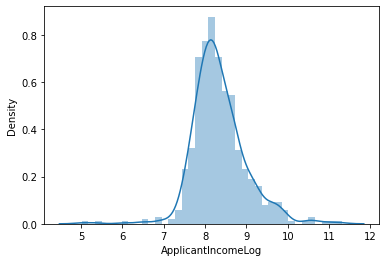

In [23]:
# apply log transformation to the attribute
dt['ApplicantIncomeLog'] = np.log(dt['ApplicantIncome'])
sns.distplot(dt["ApplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

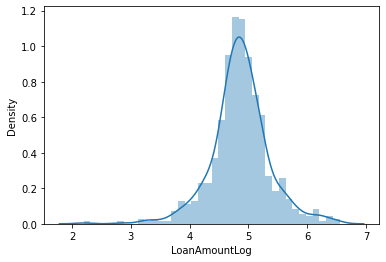

In [25]:
dt['LoanAmountLog'] = np.log(dt['LoanAmount'])
sns.distplot(dt["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

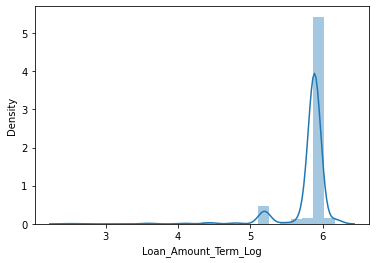

In [26]:
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
sns.distplot(dt["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

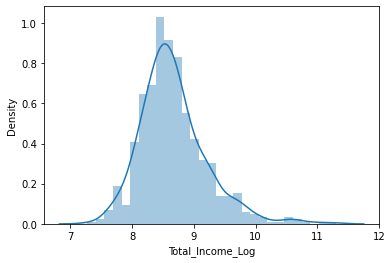

In [27]:
dt['Total_Income_Log'] = np.log(dt['Total_Income'])
sns.distplot(dt["Total_Income_Log"])

## Coorelation Matrix

<AxesSubplot:>

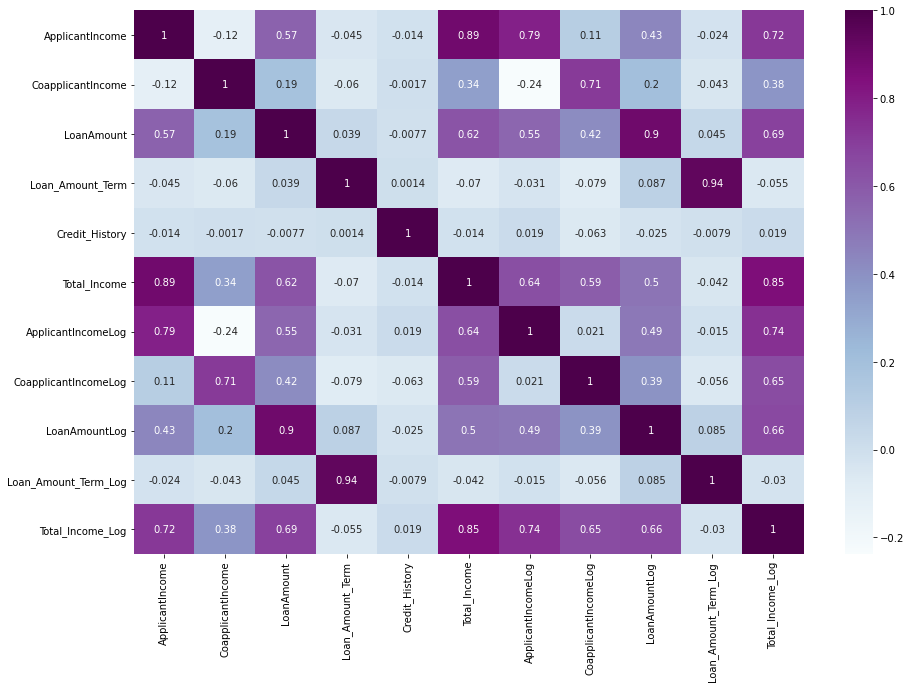

In [28]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [29]:
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   CoapplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  Total_Income_Log  
0                  -inf       4.986426              5.886104          8.674026  
1              7.318540       4.852030              5.886104          8.714568  
2                  -inf       4.189655              5.886104          8.006368  
3              7.765569       4.787492              5.886104          8.505323  
4                  -inf       4.948760              5.886104          8.699515

In [30]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
dt = dt.drop(columns=cols, axis=1)
dt.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0         Urban           Y            8.674026       4.986426   
1         Rural           N            8.430109       4.852030   
2         Urban           Y            8.006368       4.189655   
3         Urban           Y            7.856707       4.787492   
4         Urban           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

In [32]:
dt.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              2            1            8.674026       4.986426   
1              0            0            8.430109       4.852030   
2              2            1            8.006368       4.189655   
3              2            1            7.856707       4.787492   
4              2            1            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

## Train-Test Split

In [33]:
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [35]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 78.37837837837837
Cross validation is 80.9462881514061


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.43243243243244
Cross validation is 69.54818072770891


In [38]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.91891891891892
Cross validation is 78.01546048247367


In [39]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.51351351351352
Cross validation is 77.52898840463814


In [40]:
from xgboost import XGBClassifier

In [41]:
model = XGBClassifier()
classify(model, X, y)

[22:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 77.29729729729729
[22:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:49] WARNING: C:/Users/Administrat

In [42]:
from lightgbm import LGBMClassifier

In [43]:
lgb = LGBMClassifier()
classify(lgb, X, y)

Accuracy is 75.67567567567568
Cross validation is 76.5480474476876


In [45]:
from catboost import CatBoostClassifier

In [46]:
cb = CatBoostClassifier()
classify(cb, X, y)

Learning rate set to 0.007178
0:	learn: 0.6893192	total: 73ms	remaining: 1m 12s
1:	learn: 0.6855285	total: 76.1ms	remaining: 38s
2:	learn: 0.6818939	total: 79.3ms	remaining: 26.4s
3:	learn: 0.6778858	total: 82.3ms	remaining: 20.5s
4:	learn: 0.6744567	total: 83.9ms	remaining: 16.7s
5:	learn: 0.6705690	total: 87.1ms	remaining: 14.4s
6:	learn: 0.6665638	total: 90.2ms	remaining: 12.8s
7:	learn: 0.6627720	total: 93.2ms	remaining: 11.6s
8:	learn: 0.6590211	total: 96.2ms	remaining: 10.6s
9:	learn: 0.6554450	total: 99.1ms	remaining: 9.81s
10:	learn: 0.6523040	total: 101ms	remaining: 9.09s
11:	learn: 0.6489726	total: 104ms	remaining: 8.56s
12:	learn: 0.6454154	total: 107ms	remaining: 8.15s
13:	learn: 0.6418260	total: 111ms	remaining: 7.79s
14:	learn: 0.6384692	total: 114ms	remaining: 7.46s
15:	learn: 0.6356122	total: 115ms	remaining: 7.08s
16:	learn: 0.6327070	total: 118ms	remaining: 6.81s
17:	learn: 0.6294651	total: 123ms	remaining: 6.71s
18:	learn: 0.6264251	total: 127ms	remaining: 6.58s
19:	

## Hyperparameter tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
rf = RandomForestClassifier()

In [51]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [52]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [53]:
rf.best_score_

0.809462881514061

In [54]:
rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [55]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [56]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt=RandomizedSearchCV(estimator = dt, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [59]:
dt.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.0s
[CV] min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [60]:
dt.best_score_

0.7865920298547248

In [61]:
dt.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [62]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [63]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
ex = ExtraTreesClassifier()

In [65]:
ex=RandomizedSearchCV(estimator = ex, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
ex.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [67]:
ex.best_score_

0.809462881514061

In [68]:
ex.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [69]:
from scipy.stats import uniform, randint

In [70]:
xgb=XGBClassifier()

In [71]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [72]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [73]:
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.2s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.2s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.2s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DDAB58C708>,
                                        'max_dep

In [75]:
xgb.best_score_

0.801332800213248

In [76]:
xgb.best_params_

{'gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [77]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [78]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [79]:
cb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................
0:	learn: 0.6476884	total: 43.1ms	remaining: 43s
1:	learn: 0.6092674	total: 68ms	remaining: 33.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2:	learn: 0.5804011	total: 74.8ms	remaining: 24.9s
3:	learn: 0.5570911	total: 76.7ms	remaining: 19.1s
4:	learn: 0.5379657	total: 79.1ms	remaining: 15.7s
5:	learn: 0.5167507	total: 121ms	remaining: 20.1s
6:	learn: 0.5040144	total: 126ms	remaining: 17.9s
7:	learn: 0.4866200	total: 155ms	remaining: 19.2s
8:	learn: 0.4702539	total: 181ms	remaining: 19.9s
9:	learn: 0.4568103	total: 195ms	remaining: 19.3s
10:	learn: 0.4430649	total: 220ms	remaining: 19.8s
11:	learn: 0.4338424	total: 234ms	remaining: 19.2s
12:	learn: 0.4218191	total: 259ms	remaining: 19.7s
13:	learn: 0.4079188	total: 302ms	remaining: 21.3s
14:	learn: 0.3986568	total: 328ms	remaining: 21.5s
15:	learn: 0.3892861	total: 353ms	remaining: 21.7s
16:	learn: 0.3805437	total: 380ms	remaining: 21.9s
17:	learn: 0.3755492	total: 383ms	remaining: 20.9s
18:	learn: 0.3717750	total: 388ms	remaining: 20s
19:	learn: 0.3671217	total: 412ms	remaining: 20.2s
20:	learn: 0.3589612	total: 452ms	remaining: 21.1s
21:	learn: 0.3536183	total: 473ms	rema

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.6s remaining:    0.0s


10:	learn: 0.4380494	total: 132ms	remaining: 11.9s
11:	learn: 0.4299517	total: 137ms	remaining: 11.2s
12:	learn: 0.4247469	total: 139ms	remaining: 10.6s
13:	learn: 0.4143194	total: 177ms	remaining: 12.4s
14:	learn: 0.4044825	total: 206ms	remaining: 13.5s
15:	learn: 0.4002008	total: 209ms	remaining: 12.9s
16:	learn: 0.3889999	total: 241ms	remaining: 14s
17:	learn: 0.3836068	total: 246ms	remaining: 13.4s
18:	learn: 0.3728618	total: 271ms	remaining: 14s
19:	learn: 0.3661670	total: 297ms	remaining: 14.6s
20:	learn: 0.3583071	total: 323ms	remaining: 15s
21:	learn: 0.3490198	total: 362ms	remaining: 16.1s
22:	learn: 0.3435745	total: 389ms	remaining: 16.5s
23:	learn: 0.3406707	total: 393ms	remaining: 16s
24:	learn: 0.3366410	total: 401ms	remaining: 15.6s
25:	learn: 0.3316961	total: 426ms	remaining: 16s
26:	learn: 0.3258143	total: 452ms	remaining: 16.3s
27:	learn: 0.3217423	total: 478ms	remaining: 16.6s
28:	learn: 0.3157824	total: 503ms	remaining: 16.9s
29:	learn: 0.3096414	total: 530ms	remaini

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.8min finished


34:	learn: 0.3754769	total: 113ms	remaining: 3.12s
35:	learn: 0.3744786	total: 116ms	remaining: 3.1s
36:	learn: 0.3724741	total: 119ms	remaining: 3.09s
37:	learn: 0.3701833	total: 122ms	remaining: 3.09s
38:	learn: 0.3681510	total: 125ms	remaining: 3.08s
39:	learn: 0.3666672	total: 128ms	remaining: 3.08s
40:	learn: 0.3647152	total: 131ms	remaining: 3.07s
41:	learn: 0.3627934	total: 134ms	remaining: 3.06s
42:	learn: 0.3594040	total: 137ms	remaining: 3.06s
43:	learn: 0.3566404	total: 141ms	remaining: 3.05s
44:	learn: 0.3527584	total: 144ms	remaining: 3.05s
45:	learn: 0.3518322	total: 147ms	remaining: 3.04s
46:	learn: 0.3484767	total: 150ms	remaining: 3.05s
47:	learn: 0.3466336	total: 153ms	remaining: 3.04s
48:	learn: 0.3453009	total: 157ms	remaining: 3.04s
49:	learn: 0.3445583	total: 160ms	remaining: 3.04s
50:	learn: 0.3430946	total: 163ms	remaining: 3.03s
51:	learn: 0.3418103	total: 166ms	remaining: 3.03s
52:	learn: 0.3383452	total: 169ms	remaining: 3.02s
53:	learn: 0.3361864	total: 172m

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001DDAAFEFA08>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [80]:
cb.best_score_

0.7882846861255497

In [81]:
cb.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'depth': 6}

## Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 28,  37],
       [  4, 116]], dtype=int64)

<AxesSubplot:>

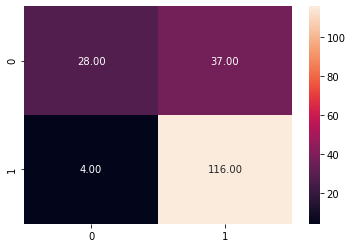

In [84]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [85]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

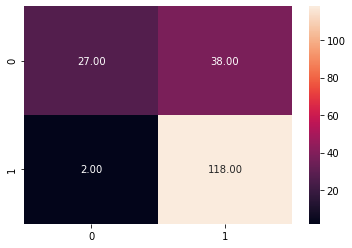

In [86]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [87]:
y_pred = ex.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

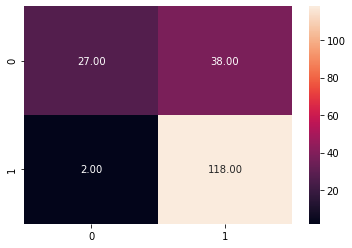

In [88]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [89]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 29,  36],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

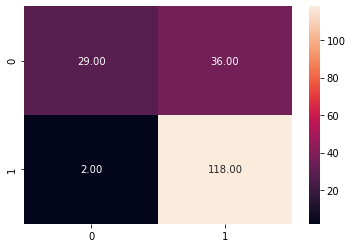

In [90]:
sns.heatmap(cm, annot=True,fmt='.2f')